<h2 align="center"> Multivariable Regression </h2>

## Machine Learning - Andrew Ng ( Python Implementation)

## Multivariable Linear Regression

### Loading Data & Libraries

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

In [42]:
data = pd.read_csv('Multi_linear.txt', header = None)

In [43]:
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [44]:
data.info

<bound method DataFrame.info of        0  1       2
0   2104  3  399900
1   1600  3  329900
2   2400  3  369000
3   1416  2  232000
4   3000  4  539900
5   1985  4  299900
6   1534  3  314900
7   1427  3  198999
8   1380  3  212000
9   1494  3  242500
10  1940  4  239999
11  2000  3  347000
12  1890  3  329999
13  4478  5  699900
14  1268  3  259900
15  2300  4  449900
16  1320  2  299900
17  1236  3  199900
18  2609  4  499998
19  3031  4  599000
20  1767  3  252900
21  1888  2  255000
22  1604  3  242900
23  1962  4  259900
24  3890  3  573900
25  1100  3  249900
26  1458  3  464500
27  2526  3  469000
28  2200  3  475000
29  2637  3  299900
30  1839  2  349900
31  1000  1  169900
32  2040  4  314900
33  3137  3  579900
34  1811  4  285900
35  1437  3  249900
36  1239  3  229900
37  2132  4  345000
38  4215  4  549000
39  2162  4  287000
40  1664  2  368500
41  2238  3  329900
42  2567  4  314000
43  1200  3  299000
44   852  2  179900
45  1852  4  299900
46  1203  3  239500>

In [45]:
data.describe()

,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


### Plotting Data

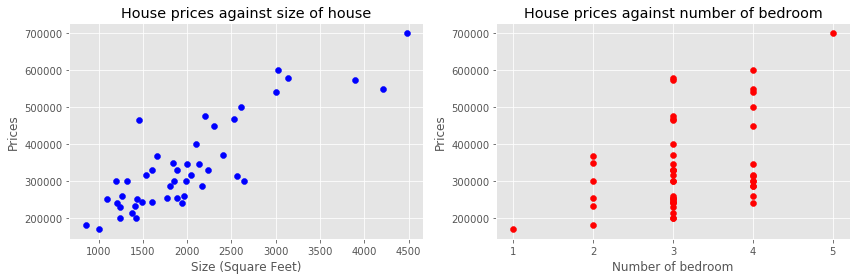

In [46]:
# Create 2 Subplot, 1 for Each Variable
fig, axes = plt.subplots(figsize=(12,4),nrows=1,ncols=2)

axes[0].scatter(data[0],data[2],color="b")
axes[0].set_xlabel("Size (Square Feet)")
axes[0].set_ylabel("Prices")
axes[0].set_title("House prices against size of house")
axes[1].scatter(data[1],data[2],color="r")
axes[1].set_xlabel("Number of bedroom")
axes[1].set_ylabel("Prices")
axes[1].set_xticks(np.arange(1,6,step=1))
axes[1].set_title("House prices against number of bedroom")

# Enhance Layout
plt.tight_layout()

### Feature Normalization

To make sure features are on a similar scale:

$x_i = \frac{x_i - \mu_i}{\sigma_i}$
---

In [47]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

### Compute the Cost Function $J(\Theta)$

$J(\Theta) = \frac{1}{2m} \sum_{i=1}^m (h_\Theta(x^{(i)}) - y^{(i)} )^2$

In [48]:
def computeCost(X,y,theta):
    """
    Take in a numpy array X,y, theta and generate the cost function of using theta as parameter
    in a linear regression model
    """
    m=len(y)
    predictions=X.dot(theta)
    square_err=(predictions - y)**2
    
    return 1/(2*m) * np.sum(square_err)

In [49]:
data_n=data.values
m=len(data_n[:,-1])
X=data_n[:,0:2].reshape(m2,2)
X, mean_X, std_X = featureNormalization(X)
X = np.append(np.ones((m,1)),X,axis=1)
y=data_n[:,-1].reshape(m,1)
theta=np.zeros((3,1))

### Compute Cost $J(\Theta)$

In the multivariate case, the cost function can also be written in the following vectorized form:

$J(\Theta) = \frac{1}{2m} (X\Theta - \overrightarrow{y})^T (X\Theta - \overrightarrow{y})$


In [50]:
computeCost(X,y,theta)

65591548106.45744

### Gradient Descent

In [51]:
theta2, J_history2 = gradientDescent(X2,y2,theta2,0.1,400)
print("h(x) ="+str(round(theta2[0,0],2))+" + "+str(round(theta2[1,0],2))+"x1 + "+str(round(theta2[2,0],2))+"x2")

h(x) =340412.66 + 109447.8x1 + -6578.35x2


### Visualising the Cost Function $J(\Theta)$


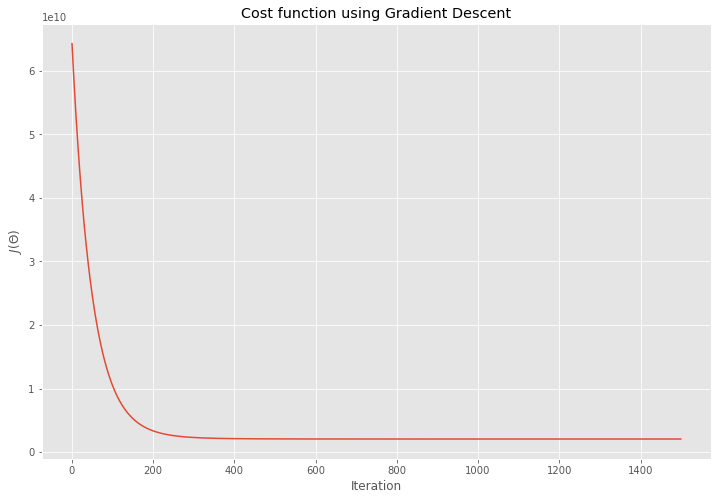

In [53]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent");